# ENDG 310 Project #1

## Loading and Visualizing Data
 
Below is my code for loading arranging my data in a format that will be easy for me to work with. I have downloaded several sets of data, the first is daily data from Canada Border Services Agency (CBSA) which lists how many people have entered the coutry every day for the past five year (2018-2023). The next sets of data are all data on yearly wages, one for each year from 2018-2022. I will load the Canada Border Services code and read it, and I will combine the five csv file for wages into one dataframe.

In [ ]:
import sys
sys.path.append('c:\\Users\\Isabel Conklin\\Documents\\ENDG 310\\Github23-24\\ENDG310-Project-1-F2023\\Functions')


### CBSA Data

Here I am organizing the CBSA data into dictionaries with the year as the key and an array as the value, it is editable so I can have however many columns in the array as I would like. I am also making a separate dictionary with seasons as the key and an array as the value, once again it is easily editable.

In [2]:
# CBSA data
import pandas as pd
from Functions.year_arrays import make_year_arrays
from Functions.seasons_sort import seasons_sort


# Load CBSA data
cbsa = pd.read_csv('Data/traveller_report.csv', encoding= 'ISO-8859-1')

# Sort into arrays for each year using make_year_arrays function
data_by_year = make_year_arrays('Data/traveller_report.csv', 'Date', ['Sum of Volume'])
print(data_by_year)

# # Sort into seasons for each year array using seasons function
data_by_season = seasons_sort('Data/traveller_report.csv', 'Date', ['Sum of Volume'])


{2018: array([[119],
       [843],
       [364],
       ...,
       [127],
       [ 26],
       [  6]], dtype=int64), 2019: array([[635],
       [314],
       [ 30],
       ...,
       [101],
       [ 35],
       [ 11]], dtype=int64), 2020: array([[888],
       [382],
       [ 38],
       ...,
       [ 22],
       [ 36],
       [  5]], dtype=int64), 2021: array([[ 7],
       [40],
       [39],
       ...,
       [23],
       [17],
       [ 6]], dtype=int64), 2022: array([[59],
       [71],
       [26],
       ...,
       [23],
       [82],
       [ 7]], dtype=int64), 2023: array([[  9],
       [580],
       [383],
       ...,
       [  6],
       [137],
       [ 70]], dtype=int64)}


### Wages Data

Here I am working with the wages data, in this cell I am using a funcion I have created to add a year column to each of the wages DataFrames. Underneath is code which can be uncommented and then used to delete extra year columns in case I accidentally run this cell more than once.

In [ ]:
# Configuring the wages data into a format that is easier to work with
from Functions.add_year_column import add_year_column

# Adding a year column to each of the csv files using add_year_column function
add_year_column('Data/wages_2018.csv', 'Data/wages_2018.csv', 'Year', '2018')
add_year_column('Data/wages_2019.csv', 'Data/wages_2019.csv', 'Year', '2019')
add_year_column('Data/wages_2020.csv', 'Data/wages_2020.csv', 'Year', '2020')
add_year_column('Data/wages_2021.csv', 'Data/wages_2021.csv', 'Year', '2021')
add_year_column('Data/wages_2022.csv', 'Data/wages_2022.csv', 'Year', '2022')

# In case I accidentally add multiple years columns, can delete using this
# df5 = pd.read_csv('Data/wages_2018.csv')
# delete_columns = ['Year.1']  # Fix this line
# df5.drop(columns=delete_columns, inplace=True)
# df5.to_csv('Data/wages_2018.csv', index=False)

Here I combine all of the wages DataFrames into one DataFrame.

In [2]:
# Configuring the wages data into a format that is easier to work with
import pandas as pd

# Combine all wages data together into one file
# Create a list of file names
file_names = ['Data/wages_2018.csv', 'Data/wages_2019.csv', 'Data/wages_2020.csv', 'Data/wages_2021.csv', 'Data/wages_2022.csv']

# Initialize an empty list to store individual DataFrames
dfs = []

# Loop through the files and read them into DataFrames, then append to the list
for file in file_names:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate the DataFrames vertically
combined_df = pd.concat(dfs, ignore_index=True)

# Save the combined files to a new csv file
combined_df.to_csv('Data/wages_all.csv', index=False)


Here I sort the DataFrame to only contain the jobs related to or impacted by tourism. Then I sort the wages data into a dictionary with the year as the key and an array as the value.

In [1]:
import pandas as pd
from Functions.filtered_data import filter_jobs_impacted_by_tourism
from Functions.year_arrays import make_year_arrays

# Read the CSV file into a DataFrame
wage_data = pd.read_csv('Data/wages_all.csv', encoding='ISO-8859-1')

# Define a list of tourism-related keywords
tourism_keywords = ['retail', 'tour', 'restaurant', 'hotel', 'hospitality', 'cleaner', 'travel', 'pilot', 'flight', 'accomodation', 'border', 'guide', 'drive']

# Filter out unwanted professions using filter_jobs_impacted_by_tourism function
filtered_wage_data = filter_jobs_impacted_by_tourism(wage_data, tourism_keywords)
filtered_wage_data.to_csv('Data/wages_filtered.csv')

# Sort into arrays for each year using make_year_arrays function
wages_by_year = make_year_arrays('Data/wages_filtered.csv', 'Year', ['Median_Wage_Salaire_Median'])
# print(wages_by_year)


C:\Users\Isabel Conklin\AppData\Local\Temp\ipykernel_15284\3680902668.py:6: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  wage_data = pd.read_csv('Data/wages_all.csv', encoding='ISO-8859-1')


## Creating the Graphs

Now that I have formatted the data in the way that I prefer to work with it I am ready to begin making my graphs. I am going to make four or five graphs, one showing the amount of people who enter Canada every year, one showing people entering Canada seasonally, one showing the mean wages in industries impacted by tourism, one plotting both together (tourism & wages), and some showing tourism by region (interactivity).

### Number of People Entering Canada by Year (2018-2023)

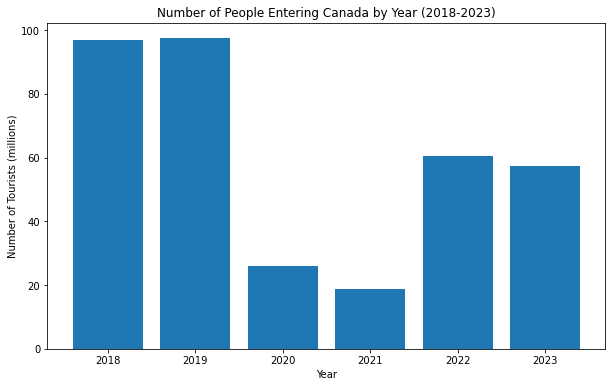

In [2]:
# Graph showing how many people entered the country annually
from Functions.create_bar_chart import create_bar_chart

# Call the function to plot the graph
create_bar_chart(data_by_year)

### Number of People Visiting Canada Seasonally

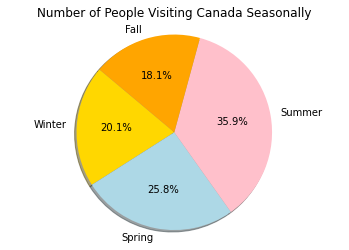

In [2]:
# Code for people entering Canada seasonally
from Functions.create_seasonal_pie_chart import create_seasonal_pie_chart

# Call the function to plot the graph
create_seasonal_pie_chart(data_by_season)

### Average Wages in Industries Impacted by Tourism

Years [2018, 2019, 2020, 2021, 2022]
Average wage by year [20.958342541436465, 19.03762271414822, 19.60385294117647, 20.240048216007715, 20.958342541436465]


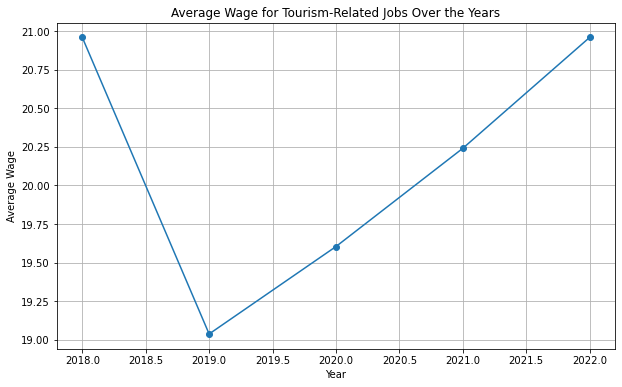

In [2]:
# Code for line graph showing average wages by year
from Functions.create_wages_line_graph import create_wages_line_graph

# Call the function to plot the graph
create_wages_line_graph(wages_by_year)
